## Name: {add your name here}
## Section: {add your section # here}

# Lab 7: Binary Trees

## Tools

#### Libraries:

- numpy: for processing
- sklearn: for model training  
- pandas: for data processing  
- dtreeviz: for visualization
- lolviz: for visualization

#### Datasets:

None 

## Setup

You should already have dtreeviz installed from the last lab. For this lab you will need another library called `lolviz` which you can install within the Jupyter notebook, but you first should first install `graphviz`, which is easy to do on a Mac.

```
brew install graphviz
```

In [3]:
# Uncomment if you need to install lolviz
!pip install -q lolviz


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import dtreeviz
from lolviz import *

import numpy as np
import pandas as pd

---
## Binary tree class definition

A binary tree has a value and references to left and right children. One or both of the children references can be `None`.   A reference to a node is the same thing as a reference to a tree as the tree is a self similar data structure. We don't distinguish between the two kinds of references. A reference to the root node is a reference to the entire tree (the entire tree is contained within).

Here is a basic tree node class in Python. The constructor requires at least a value to store in the node.

In [8]:
class TreeNode:
  def __init__(self, value, left=None, right=None):
    self.value = value
    self.left = left
    self.right = right
  def __repr__(self):
    return str(self.value)
  def __str__(self):
    return str(self.value)

---
## Manual tree construction

Here's how to create and visualize a single node:

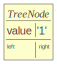

In [9]:
root = TreeNode(1)
treeviz(root)

---
**Given `left` and `right` nodes,  create node `root` with those nodes as children.**

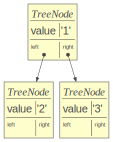

In [10]:
left = TreeNode(2)
right = TreeNode(3)
root = TreeNode(1, left = left, right = right)
treeviz(root)

---
**Write code to create the following tree structure**

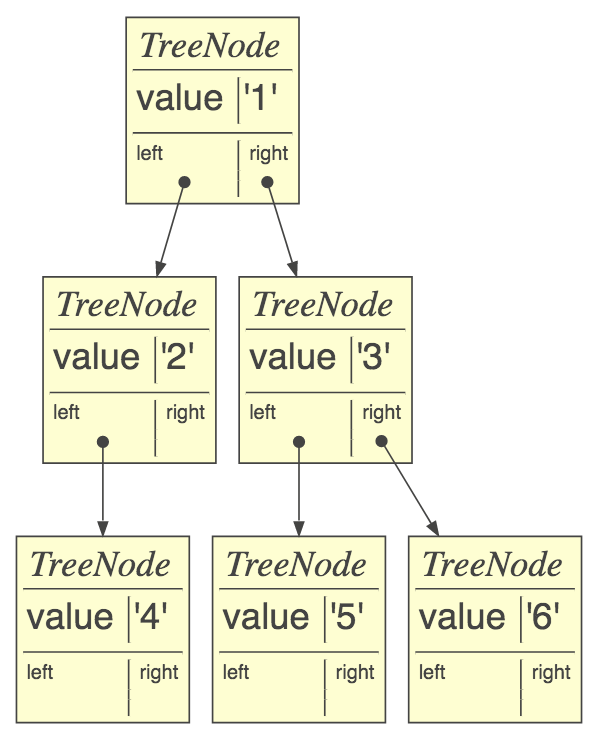

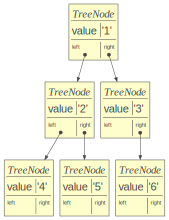

In [11]:
# YOUR CODE HERE
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.right = TreeNode(6)
root.left = TreeNode(2)
root.right = TreeNode(3)
root = TreeNode(1, left = left, right = right)
treeviz(root)

---
## Walking trees manually

To walk a tree, we simply follow the left and right children references, avoiding any `None` references.

**Q.** Given tree `r` shown here, what Python expressions refer to the nodes with 443 and 17 in them?

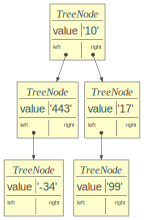

In [12]:
left = TreeNode(443,TreeNode(-34))
right = TreeNode(17,TreeNode(99))
r = TreeNode(10,left,right)
treeviz(r)

In [14]:
# YOUR CODE HERE
r.left

443

In [15]:
r.right

17

<details>
<summary>Solution</summary>
<pre>
r.left, r.right
</pre>
</details>

**Q.** Given the same tree `r`, what Python expressions refer to the nodes with -34 and 99 in them?

In [19]:
# YOUR CODE HERE
r.left.left

-34

In [21]:
r.right.left

99

---
## Walking all nodes

Now let's create a function to walk all nodes in a tree. Remember that our template for creating any recursive function looks like this:

```
def f(input):
    1. check termination condition
    2. process the active input region / current node, etc…
    3. invoke f on subregion(s)
    4. combine and return results
```

In [22]:
def walk(p:TreeNode):
    if p is None: return           # step 1
    print(p.value)                 # step 2
    walk(p.left)                   # step 3
    walk(p.right)                  # step 3 (there is no step 4 for this problem)

Let's create the simple 3-level tree we had before:

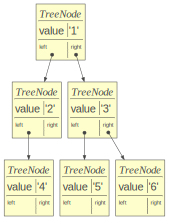

In [23]:
left = TreeNode(2, TreeNode(4))
right = TreeNode(3, TreeNode(5), TreeNode(6))
root = TreeNode(1, left, right)
treeviz(root)

**Q.** What is the output of running `walk(root)`?

In [24]:
walk(root)

1
2
4
3
5
6


<details>
<summary>Solution</summary>
    We walk the tree depth first, from left to right<p>
<pre>
1
2
4
3
5
6
</pre>
</details>

---
## Searching through nodes

Here's how to search for an element as you walk, terminating as soon as the node with `x` is found:

In [25]:
def search(p:TreeNode, x:object):
    print("enter ", p)
    if p is None: return None
    print(p)
    if x==p.value:
        return p
    q = search(p.left, x)
    if q is not None:
        return q
    q = search(p.right, x)
    return q

**Q.** What is the output of running `search(root, 5)`?

In [26]:
search(root, 5)

enter  1
1
enter  2
2
enter  4
4
enter  None
enter  None
enter  None
enter  3
3
enter  5
5


5

<details>
<summary>Solution</summary>
    We walk the tree depth first as before, but now we stop when we reach the node with 5:<p>
<pre>
1
2
4
3
5
</pre>
</details>

To see the recursion entering and exiting (or discovering and finishing) nodes, here is a variation that prints out its progress through the tree:

In [27]:
def search(p:TreeNode, x:object):
    if p is None: return None
    print("enter ",p)
    if x==p.value:
        print("exit  ",p)
        return p
    q = search(p.left, x)
    if q is not None:
        print("exit  ",p)
        return q
    q = search(p.right, x)
    print("exit  ",p)
    return q

In [28]:
search(root, 5)

enter  1
enter  2
enter  4
exit   4
exit   2
enter  3
enter  5
exit   5
exit   3
exit   1


5

---
## Creating (random) decision tree "stumps"

A regression tree stump is a tree with a decision node at the root and two predictor leaves.  These are used by gradient boosting machines as the "weak learners."

In [29]:
class TreeNode: # acts as decision node and leaf. it's a leaf if split is None
  def __init__(self, split=None, prediction=None, left=None, right=None):
    self.split = split
    self.prediction = prediction
    self.left = left
    self.right = right
  def __repr__(self):
    return str(self.value)
  def __str__(self):
    return str(self.value)

In [30]:
df = pd.DataFrame()
df["sqfeet"] = [750, 800, 850, 900,950]
df["rent"] = [1160, 1200, 1280, 1450,1300]
df

,sqfeet,rent
0,750,1160
1,800,1200
2,850,1280
3,900,1450
4,950,1300


The following code shows where sklearn would do a split with a normal decision tree.

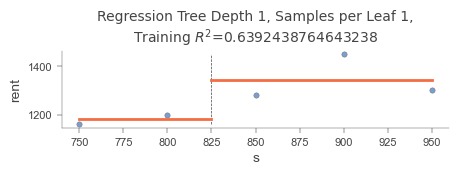

In [31]:
X, y = df.sqfeet.values.reshape(-1,1), df.rent.values
t = DecisionTreeRegressor(max_depth=1)
t.fit(X,y)

viz_model = dtreeviz.model(t,
                           X_train=X, y_train=y,
                           feature_names='sqfeet',
                           target_name='rent')

viz_model.rtree_feature_space(show={'title', 'splits'}, features=['sqfeet'],
                             figsize=(5,1))

Instead of picking the optimal split point, we can choose a random value in between the minimum and maximum x value, like the extra trees algorithm does:

In [32]:
def stumpfit(x, y):
    if len(x)==1 or len(np.unique(x))==1: # if one x value, make leaf
        return TreeNode(prediction=y[0])
    split = np.round(np.random.uniform(min(x),max(x)))
    t = TreeNode(split)
    t.left = TreeNode(prediction=np.mean(y[x<split]))
    t.right = TreeNode(prediction=np.mean(y[x>=split]))
    return t

**Run the following code multiple times to see how it creates different y lists in the nodes, according to the split value.**

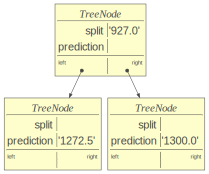

In [33]:
root = stumpfit(X.reshape(-1),y)
treeviz(root)

---
## Creating random decision trees (single variable)

And now to demonstrate the magic of recursion. If we replace

```
t.left = TreeNode(prediction=np.mean(y[x<split]))
```

with

```
t.left  = treefit(x[x<split],  y[x<split])
```

(and same for `t.right`) then all of the sudden we get a full decision tree, rather than just a stump!

In [34]:
def treefit(x, y):
    if len(x)==1 or len(np.unique(x))==1: # if one x value, make leaf
        return TreeNode(prediction=y[0])
    split = np.round(np.random.uniform(min(x),max(x)))
    t = TreeNode(split)
    t.left  = treefit(x[x<split],  y[x<split])
    t.right = treefit(x[x>=split], y[x>=split])
    return t

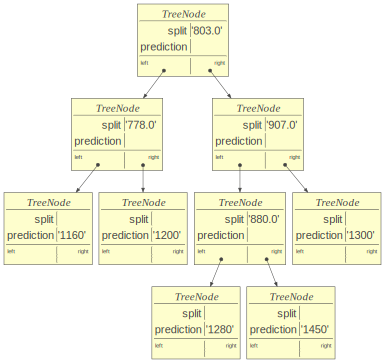

In [35]:
root = treefit(X.reshape(-1),y)
treeviz(root)

You can run that multiple times to see different tree layouts according to randomness.

**Q.** How would you modify `treefit()` so that it creates a typical decision tree rather than a randomized decision tree?